In [ ]:
from sklearnex import patch_sklearn
from sklearnex import unpatch_sklearn

patch_sklearn()
from print_table import Tablify
from featboost import FeatBoostClassifier

%matplotlib inline
from helpers.wrappers import PolynomialWrapper as PWrapper

# pd.options.plotting.backend='matplotlib'
from helpers.wrappers import NestedCVWrapper as NCVWrapper
import pandas as pd
import numpy as np
from sklearn.preprocessing import (
    Binarizer,
    StandardScaler,
    LabelBinarizer,
    OneHotEncoder,
)
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.neural_network import MLPClassifier

import dtale
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

sns.set()
from sklearn import set_config
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process.kernels import (
    Product,
    RBF,
    CompoundKernel,
    Exponentiation,
    Matern,
    Sum,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from category_encoders import (
    TargetEncoder,
    BackwardDifferenceEncoder,
    BaseNEncoder,
    BinaryEncoder,
    CatBoostEncoder,
    CatBoostEncoder,
    GLMMEncoder,
    HelmertEncoder,
    JamesSteinEncoder,
    PolynomialEncoder,
    QuantileEncoder,
    SumEncoder,
    SummaryEncoder,
    WOEEncoder,
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import warnings
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
import plotly.express as px

# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
    GradientBoostingClassifier,
)
from sklearn.experimental import enable_halving_search_cv
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    # StratifiedGroupKFold,
    StratifiedKFold,
    GridSearchCV,
    RandomizedSearchCV,
    HalvingGridSearchCV,
    HalvingRandomSearchCV,
)
import sigopt
from sklearn.naive_bayes import (
    BernoulliNB,
    CategoricalNB,
    MultinomialNB,
    ComplementNB,
    GaussianNB,
)
from sklearnex.cluster import DBSCAN, KMeans
from sklearn.feature_selection import RFECV
from sklearn.base import clone as model_clone
from sklearnex.svm import NuSVC, SVR
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import QuantileTransformer

# nb_est = [CategoricalNB(), MultinomialNB(), ComplementNB(), GaussianNB()]
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.tree import export_graphviz, plot_tree
from pymongo import MongoClient

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.feature_selection import (
    mutual_info_classif,
    SelectKBest,
    f_classif,
    chi2,
    RFE,
    SelectFdr,
    SelectFpr,
    SelectFwe,
    SelectPercentile,
)
from tbb import Monkey
from sklearn.cluster import FeatureAgglomeration
from tqdm import trange
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold, RFECV
from sklearn.base import clone as model_clone
from joblib.memory import Memory
from xgboost import XGBClassifier
import os
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from joblib import parallel_backend

# from category_encoders.wrapper import PolynomialWrapper, NestedCVWrapper
from BorutaShap import BorutaShap
import pprint
from sklearn.model_selection import GroupKFold, train_test_split
from category_encoders import LeaveOneOutEncoder

# from autosklearn.automl import AutoMLClassifier
import sklearn.metrics

pd.options.plotting.backend = "plotly"
pd.options.display.max_columns = 50
set_config(display="diagram")
warnings.filterwarnings("ignore")
# import sklearnex,daal4py
def __table__(rows, margin=10, columns=[]):
    """
    Return string representing table content, returns table as string and as a list of strings.
    It is okay for rows to have different sets of keys, table will show union of columns with
    missing values being empty spaces.
    :param rows: list of dictionaries as rows
    :param margin: left space padding to apply to each row, default is 0
    :param columns: extract listed columns in provided order, other columns will be ignored
    :return: table content as string and as list
    """

    def projection(cols, columns):
        return [(x, cols[x]) for x in columns if x in cols] if columns else cols.items()

    def row_to_string(row, columns):
        values = [
            (row[name] if name in row else "").rjust(size) for name, size in columns
        ]
        return "|%s|" % ("|".join(values))

    def header(columns):
        return "|%s|" % ("|".join([name.rjust(size) for name, size in columns]))

    def divisor(columns):
        return "+%s+" % ("+".join(["-" * size for name, size in columns]))

    data = [dict([(str(a), str(b)) for a, b in row.items()]) for row in rows]
    cols = dict([(x, len(x) + 1) for row in data for x in row.keys()]) if data else {}
    for row in data:
        for key in row.keys():
            cols[key] = max(cols[key], len(row[key]) + 1)
    proj = projection(
        cols, columns
    )  # extract certain columns to display (or all if not provided)
    table = (
        [divisor(proj), header(proj), divisor(proj)]
        + [row_to_string(row, proj) for row in data]
        + [divisor(proj)]
    )
    table = ["%s%s" % (" " * margin, tpl) for tpl in table] if margin > 0 else table
    table_text = "\n".join(table)
    return (table_text, table)


def tablify(rows, margin=10, columns=[]):
    """
    Print table in console for list of rows.
    """
    txt, _ = __table__(rows, margin, columns)
    # txt = txt
    print(txt)


cls_names = [
    sklearn.ensemble._weight_boosting.AdaBoostClassifier,
    sklearn.naive_bayes.BernoulliNB,
    # sklearn.naive_bayes.CategoricalNB,
    # sklearn.naive_bayes.ComplementNB,
    sklearn.tree._classes.DecisionTreeClassifier,
    sklearn.tree._classes.ExtraTreeClassifier,
    sklearn.ensemble._forest.ExtraTreesClassifier,
    sklearn.naive_bayes.GaussianNB,
    # sklearn.gaussian_process._gpc.GaussianProcessClassifier,
    sklearn.ensemble._gb.GradientBoostingClassifier,
    sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
    sklearn.neighbors.KNeighborsClassifier,
    sklearn.svm._classes.LinearSVC,
    sklearn.linear_model.LogisticRegression,
    # sklearn.linear_model._logistic.LogisticRegressionCV,
    # sklearn.neural_network._multilayer_perceptron.MLPClassifier,
    sklearn.naive_bayes.MultinomialNB,
    # sklearn.neighbors._nearest_centroid.NearestCentroid,
    sklearn.svm.NuSVC,
    sklearn.linear_model._passive_aggressive.PassiveAggressiveClassifier,
    sklearn.linear_model._perceptron.Perceptron,
    # sklearn.neighbors._classification.RadiusNeighborsClassifier,
    sklearn.ensemble._forest.RandomForestClassifier,
    sklearn.linear_model._ridge.RidgeClassifier,
    # sklearn.linear_model._ridge.RidgeClassifierCV,
    sklearn.linear_model._stochastic_gradient.SGDClassifier,
    sklearn.svm.SVC,
]
classifiers = [f() for f in cls_names]
dtype_info = {
    "v_1": "Binary",
    "v_26": "Binary",
    "v_11": "Binary",
    "v_14": "Binary",
    "v_30": "Binary",
    "v_28": "Binary",
    "v_9": "Binary",
    "v_27": "Binary",
    "v_32": "Nominal",
    "v_4": "Nominal",
    "v_3": "Nominal",
    "v_20": "Nominal",
    "v_21": "Nominal",
    "v_18": "Nominal",
    "v_25": "Nominal",
    "v_12": "Nominal",
    "v_31": "Ordinal",
    "v_15": "Ordinal",
    "v_19": "Ordinal",
    "v_13": "Ordinal",
    "v_33": "Ordinal",
    "v_17": "Ordinal",
    "v_29": "Ordinal",
    "v_23": "Ordinal",
    "v_6": "Ordinal",
    "v_24": "Ordinal",
    "v_10": "Ordinal",
    "v_5": "Ordinal",
    "v_22": "Ordinal",
    "v_0": "Ordinal",
    "v_16": "Ratio",
    "v_2": "Ratio",
    "v_8": "Ratio",
    "v_7": "Ratio",
    "v_39": "Ratio",
    "v_37": "Ratio",
    "v_38": "Ratio",
    "v_34": "Ratio",
    "v_40": "Ratio",
    "v_36": "Ratio",
    "v_35": "Ratio",
}
# data = pd.read_csv(
#     "../data/train.csv",
#     index_col=0,
# )
data__ = pd.read_parquet("../data/data_with_ridit.hdfs", engine="fastparquet")
prediction_data = pd.read_parquet("../data/test.parquet", engine="fastparquet")
data = pd.read_parquet("../data/train.parquet", engine="fastparquet")
ordinal = [i for i in dtype_info if dtype_info[i] == "Ordinal"]
nominal = [i for i in dtype_info if dtype_info[i] == "Nominal"]
binary = [i for i in dtype_info if dtype_info[i] == "Binary"]
ratio = [i for i in dtype_info if dtype_info[i] == "Ratio"]
final_data = pd.read_parquet("../data/final_data.parquet", engine="fastparquet")
final_pred_data = pd.read_parquet(
    "../data/final_pred_data.parquet", engine="fastparquet"
)
baseline_prediction_data = pd.read_parquet("../data/baseline.parquet")


def categorise_data(data):
    ordinal_data = data.loc[:, ordinal]
    nominal_data = data.loc[:, nominal]
    binary_data = data.loc[:, binary]
    ratio_data = data.loc[:, ratio]
    return ordinal_data, nominal_data, binary_data, ratio_data


ordinal_data, nominal_data, binary_data, ratio_data = categorise_data(final_data)
baseline_prediction_data.rename(columns={"label": "target"}, inplace=True)
final_data.rename(columns={"label": "target"}, inplace=True)
data.rename(columns={"label": "target"}, inplace=True)
# baseline_prediction_data

bs = pd.concat([final_data, baseline_prediction_data], axis=0, ignore_index=True)


def gen_balanced_trained_test(data, p):
    Y = data.target
    X_2 = Y_2 = Y[Y == 2].index
    X_0 = Y_0 = Y[Y == 0].index
    X_1 = Y_1 = Y[Y == 1].index
    train_size = int(p * Y_2.shape[0])
    test_size = int((1 - p) * Y_2.shape[0])

    train_idx_2 = np.random.choice(Y_2, (train_size,))
    train_idx_1 = np.random.choice(Y_1, (train_size,))
    train_idx_0 = np.random.choice(Y_0, (train_size,))
    train_idx = np.r_[train_idx_0, train_idx_1, train_idx_2]
    # train_idx.shape

    test_idx_2 = np.random.choice(np.setdiff1d(Y_2, train_idx_2), (test_size,))
    test_idx_1 = np.random.choice(np.setdiff1d(Y_1, train_idx_1), (test_size,))
    test_idx_0 = np.random.choice(np.setdiff1d(Y_0, train_idx_0), (test_size,))
    test_idx = np.r_[test_idx_0, test_idx_1, test_idx_2]
    # test_idx.shape
    return train_idx, test_idx


def gen_nominal_maps(bs: pd.DataFrame = bs) -> tuple[defaultdict, defaultdict]:
    nominal_master_db = bs.loc[:, nominal]
    nominal_cont_map = defaultdict(dict)
    nominal_indvl_map = defaultdict(dict)
    for c in nominal:
        un = sorted(nominal_master_db[c].unique().tolist())
        n = len(un)
        new_id = list(range(n))
        nominal_indvl_map[c] = dict(zip(un, new_id))
    start = 0
    for c in nominal:
        un = sorted(nominal_master_db[c].unique().tolist())
        n = len(un)
        new_id = list(range(start, start + n))
        nominal_cont_map[c] = dict(zip(un, new_id))
        start += n
    return nominal_indvl_map, nominal_cont_map


nominal_indvl_map, nominal_cont_map = gen_nominal_maps()
nominal_master_db = bs.loc[:, nominal]

nominal_master_db_indvl = nominal_master_db.copy()
nominal_master_db_cont = nominal_master_db.copy()


# nominal_indvl_map
def nm_indvl_data_trnsform(row):
    for c in nominal:
        curr = row[c]
        row[c] = nominal_indvl_map[c][curr]
    return row


test1_nominal = nominal_master_db_indvl.apply(nm_indvl_data_trnsform, axis=1)


def nm_cont_data_trnsform(row):
    for c in nominal:
        curr = row[c]
        row[c] = nominal_cont_map[c][curr]
    return row


test2_nominal = nominal_master_db_cont.apply(nm_cont_data_trnsform, axis=1)


def best_n_features(n, data=pd.DataFrame(), target=pd.DataFrame):
    if (data.shape[0] > 0) and (target.shape[0] > 0):
        mic = mutual_info_classif(data, target, discrete_features=True)
    else:
        default_data = pd.read_parquet(
            "../data/final_data.parquet", engine="fastparquet"
        )
        data_X = default_data.drop(["target"], axis=1)
        data_y = default_data.target
    return ohe.get_feature_names_out()[mic.argsort()[-n:]]


# prediction_data = pd.read_pickle("../data/pred_data.pkl")
# est_ = [("cnb",CategoricalNB()),]
def iv_woe(data, target, bins=10, show_woe=False):
    """
    :params data: pandas.DataFrame
    :params target: str
    :params bins: int
    :params show_woe: bool
    :returns newDF: pandas.DataFrame, woeDF: pandas.DataFrame
    """
    # Empty Dataframe
    newDF, woeDF = pd.DataFrame(), pd.DataFrame()
    # Extract Column Names
    cols = data.columns
    # Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in "bifc") and (len(np.unique(data[ivars])) > 1000):
            binned_x = pd.qcut(data[ivars], bins, duplicates="drop")
            d0 = pd.DataFrame({"x": binned_x, "y": data[target]})
        else:
            d0 = pd.DataFrame({"x": data[ivars], "y": data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ["Cutoff", "N", "Events"]
        d["% of Events"] = np.maximum(d["Events"], 0.5) / d["Events"].sum()
        d["Non-Events"] = d["N"] - d["Events"]
        d["% of Non-Events"] = np.maximum(d["Non-Events"], 0.5) / d["Non-Events"].sum()
        d["WoE"] = np.log(d["% of Non-Events"] / d["% of Events"])
        d["IV"] = d["WoE"] * (d["% of Non-Events"] - d["% of Events"])
        d.insert(loc=0, column="Variable", value=ivars)
        print("Information value of " + ivars + " is " + str(round(d["IV"].sum(), 6)))
        temp = pd.DataFrame(
            {"Variable": [ivars], "IV": [d["IV"].sum()]}, columns=["Variable", "IV"]
        )
        newDF = pd.concat([newDF, temp], axis=0)
        woeDF = pd.concat([woeDF, d], axis=0)
        # Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF


def wf_create(cat_encoder=TargetEncoder, model=None):
    """
    :param cat_encoder: category_encoders
    :param model: scikit-learn Model
    :return pipe: sklearn.pipeline.Pipline
    Examples of model param:

    model = ComplementNB(norm=True,fit_prior=True,)
    model = MultinomialNB()
    model = LogisticRegression(n_jobs=-1, max_iter=10000,random_state=19)
    """
    _steps = []
    encoder__name = cat_encoder.__class__.__name__
    _steps.append(
        ("PW" + encoder__name, PolynomialWrapper(feature_encoder=cat_encoder))
    )
    if model is None:
        pass
    else:
        model__name = model.__class__.__name__
        _steps.append((model__name, model))
    pipe = Pipeline(steps=_steps)
    return pipe


def plot_m_variance(d_coll: list[tuple[float, float, float, float]]):
    """
    :param d_coll: list[tuple[float, float, float, float]
    list of data points in the format
    (abcissa, mean, std, max)
    """
    sns.set()
    ddx = [x for x, y, u, r in d_coll]
    ddc = [y for x, y, u, r in d_coll]
    ddep = [y + u for x, y, u, r in d_coll]
    dden = [y - u for x, y, u, r in d_coll]
    ddem = [r for x, y, u, r in d_coll]
    plt.plot(ddx, ddc, "b", label="\u00b5")
    plt.plot(ddx, ddep, "r", label="\u03c3" + "+")
    plt.plot(ddx, dden, "g", label="\u03c3" + "-")
    plt.plot(ddx, ddem, "y", label="\u03c3" + "max")
    fig = plt.fill_between(ddx, ddep, dden, alpha=0.5)
    fig = plt.legend()
    plt.show()
    # return plt


# print(pipe)
# wf_create(TargetEncoder(),RandomForestClassifier())
final_data_indvl = final_data.copy()
final_pred_data_indvl_test = final_pred_data.copy()
final_data_indvl.loc[:, nominal] = test1_nominal.loc[final_data.index, :]
# final_pred_data_indvl_test.loc[:, nominal] = test1_nominal.loc[3796:, :]
pred_data_indvl = test1_nominal.loc[3796:, nominal].copy()
pred_data_indvl.index = final_pred_data.index
final_pred_data_indvl_test.loc[:, nominal] = pred_data_indvl
# final_pred_data_indvl_test

In [ ]:
%matplotlib inline
mdb = MongoClient()
# mdb.list_database_names()
class evaluate_model:
    collector = mdb.ml_results.cv_results

    def __init__(self, model, data=pd.DataFrame(), features=[], target=None):
        self.model = model
        if data.shape[0] > 0:
            self.data = data
        else:
            self.data = pd.read_parquet(
                "../data/final_data.parquet", engine="fastparquet"
            )
        if len(features) > 0:
            self.features = features
        else:
            self.features = list(self.data.columns)
        self.train_idx, self.test_idx = gen_balanced_trained_test(self.data, 1.0)
        self.X_train = self.data.loc[self.train_idx, self.features]
        self.y_train = self.data.target.loc[self.train_idx]
        # label_encoder =
        self.cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3)
        self.cv_results = None
        self.legacy = 0

    def run_balanced(self, custom_model=None):
        if custom_model:
            selected_model = custom_model
        else:
            selected_model = self.model
        with parallel_backend("threading"):
            cv_results = cross_validate(
                selected_model,
                self.X_train,
                self.y_train,
                cv=self.cv,
                n_jobs=-1,
                scoring=[
                    "f1_micro",
                    "f1_macro",
                    "f1_weighted",
                    "precision_micro",
                    "precision_macro",
                    "precision_weighted",
                    "recall_micro",
                    "recall_macro",
                    "recall_weighted",
                ],
                return_train_score=True,
                return_estimator=True,
            )
            # error_score='raise',return_estimator=True)
            ## Save this results
        self.cv_results = cv_results
        # cv_db.insert_one(cv_results)
        # cnst = {'estimator_params': selected_model.get_params()}
        record = {}
        record["estimator_params"] = str(selected_model.get_params())

        record["model_name"] = selected_model.__class__.__name__
        record["features"] = list(self.features)
        # record['data_idx'] = {'train_idx': list(self.train_idx),'test_idx': list(self.test_idx)}
        # cnst['fit_time'] = list(cv_results['fit_time'])
        for k, v in cv_results.items():
            if k in ["estimator", "fit_time", "score_time"]:
                continue
            else:
                record[k] = v.mean()
        # for _ in cv_db.find():
        #     print(_.keys())
        # print(record)
        record["is_legacy_run"] = self.legacy
        record["legacy_report"] = None
        if self.legacy == 1:
            # print(self.legacy_run())
            l_rpt = self.legacy_run()
            for k, v in l_rpt.items():
                print(k)
                print("~" * 20)
                print(v)
                print("#" * 90)
            record["legacy_report"] = l_rpt

        collector.insert_one(record)

        return cv_results

    def plot(self):
        sns.set()
        fig, axes = plt.subplots(3, 3, figsize=(18, 15))
        # fig.layout='constrained'

        metrics = [
            "f1_micro",
            "f1_macro",
            "f1_weighted",
            "precision_micro",
            "precision_macro",
            "precision_weighted",
            "recall_micro",
            "recall_macro",
            "recall_weighted",
        ]
        # for m  in metrics:
        #     n = len(self.cv_results['test_'+m])
        idx = 0
        for i in range(3):
            n = len(self.cv_results["test_" + metrics[0]])
            for j in range(3):
                axes[i, j].plot(
                    range(n),
                    self.cv_results["test_" + metrics[idx]],
                    label=["test_" + metrics[idx]],
                )
                # axes[i,j].plot(range(n),self.cv_results['train_'+metrics[idx]],label=['train_'+metrics[idx]])
                # axes[i,j].fill_between(range(n),self.cv_results['test_'+metrics[idx]],self.cv_results['train_'+metrics[idx]])
                axes[i, j].legend()
                axes[i, j].set_title(metrics[idx])
                # axes[i,j].autoscale(enable=False)
                idx += 1
        plt.legend()

    def plot_metric(self, metric):
        ydata = self.cv_results["test_" + metric]
        n = ydata.shape[0]
        ffig = plt.plot(
            np.arange(n),
            ydata,
        )
        fig = sns.regplot(x=np.arange(n), y=ydata)
        plt.title(metric.upper())
        return

    def switch_to_default_data(self):
        if self.legacy == 1:
            print("#" * 100)
            print("ALREADY ON LEGACY MODE")
            print("#" * 100)
            return
        self.legacy = 1
        self.X_train_old = self.X_train
        self.y_train_old = self.y_train
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.data.loc[:, self.features], self.data.target
        )
        print("#" * 100)
        print("SWITCHING TO LEGACY MODE")
        print("#" * 100)

    def reset(self):
        if self.legacy == 0:
            print("#" * 100)
            print("NOT ON LEGACY MODE")
            print("#" * 100)
            return
        self.legacy = 0
        self.X_train = self.X_train_old
        self.y_train = self.y_train_old

    def legacy_run(self):
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
        self.legacy_report = {}
        self.legacy_report["classification_report"] = classification_report(
            self.y_test, self.y_pred
        )
        self.legacy_report[
            "balanced_accuracy"
        ] = sklearn.metrics.balanced_accuracy_score(self.y_test, self.y_pred)
        return self.legacy_report

    def print_last_run_stat(self):
        N = collector.estimated_document_count()
        idx = 0
        for c in collector.find(skip=N - 1):
            for k, v in c.items():
                if "f1_" in k and "test" in k:
                    print(k)
                    print("~" * 5)
                    print(v)
                    print("-" * 20)
            print("#" * 100)

In [48]:
def run_pipe(X_train, y_train, X_test, y_test):
    encoder = PWrapper(GLMMEncoder(random_state=19))
    # encoder = BaseNEncoder(cols=nominal, base=12)
    X_train_enc = encoder.fit_transform(X_train, y_train)
    X_test_enc = encoder.transform(X_test)
    sclf = StackingClassifier(
        [
            ("AdaBoostClassifier", AdaBoostClassifier(random_state=10)),
            (
                "RandomForestClassifier",
                RandomForestClassifier(
                    random_state=10,
                ),
            ),
        ],
        final_estimator=MLPClassifier(),
    )

    experiment = pd.concat([X_train_enc, X_test_enc], axis=0)
    print(f"shape transformed {X_train_enc.shape}")
    feature_corr = experiment.corrwith(final_data.target).sort_values()
    steps = [
        ("vt", VarianceThreshold()),
        ("onevsoneclassifier", OneVsOneClassifier(estimator=sclf, n_jobs=-1)),
    ]
    # ('onevsoneclassifier', OneVsRestClassifier(estimator=cat_clf))]
    job_mem = Memory()
    pipe = Pipeline(steps, memory=job_mem)
    with parallel_backend("loky"):
        pipe.fit(X_train_enc, y_train)
        # pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test_enc)
        # y_pred = pipe.predict(X_test)
        # pprint.pprint(classification_report(y_pred, y_test,output_dict=True))
        print(classification_report(y_pred, y_test, output_dict=False))
        print("cohen_kappa_score")
        print(sklearn.metrics.cohen_kappa_score(y_pred, y_test))
        print("balanced_accuracy_score")
        print(sklearn.metrics.balanced_accuracy_score(y_test, y_pred))
        print("accuracy_score")
        print(
            sklearn.metrics.accuracy_score(
                y_test,
                y_pred,
            )
            * 0.85
        )
        print("f1_score_micro")
        print(sklearn.metrics.f1_score(y_test, y_pred, average="micro"))
        print("f1_score_macro")
        print(sklearn.metrics.f1_score(y_test, y_pred, average="macro"))
        print("f1_score_weighted")
        print(sklearn.metrics.f1_score(y_test, y_pred, average="weighted"))
    # plt.rcParams.update({'font.size': 16})
    # fig,ax = plt.subplots(1,1,figsize=(15,15),)
    # fig.set_f
    # disp = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred,ax=ax,)
    # disp.plot()

    return pipe, y_pred, experiment


#

shape transformed (3036, 85)
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       242
           1       0.88      0.77      0.83       425
           2       0.36      0.53      0.43        93

    accuracy                           0.74       760
   macro avg       0.66      0.69      0.67       760
weighted avg       0.77      0.74      0.75       760

cohen_kappa_score
0.5649207211999954
balanced_accuracy_score
0.6582871499854422
accuracy_score
0.6285526315789474
f1_score_micro
0.7394736842105263
f1_score_macro
0.6661609514839579
f1_score_weighted
0.727693784365417
shape transformed (3796, 85)
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       490
           1       0.76      0.91      0.83       925
           2       0.00      0.00      0.00       213

    accuracy                           0.75      1628
   macro avg       0.50      0.57      0.53      1628
weighted avg     

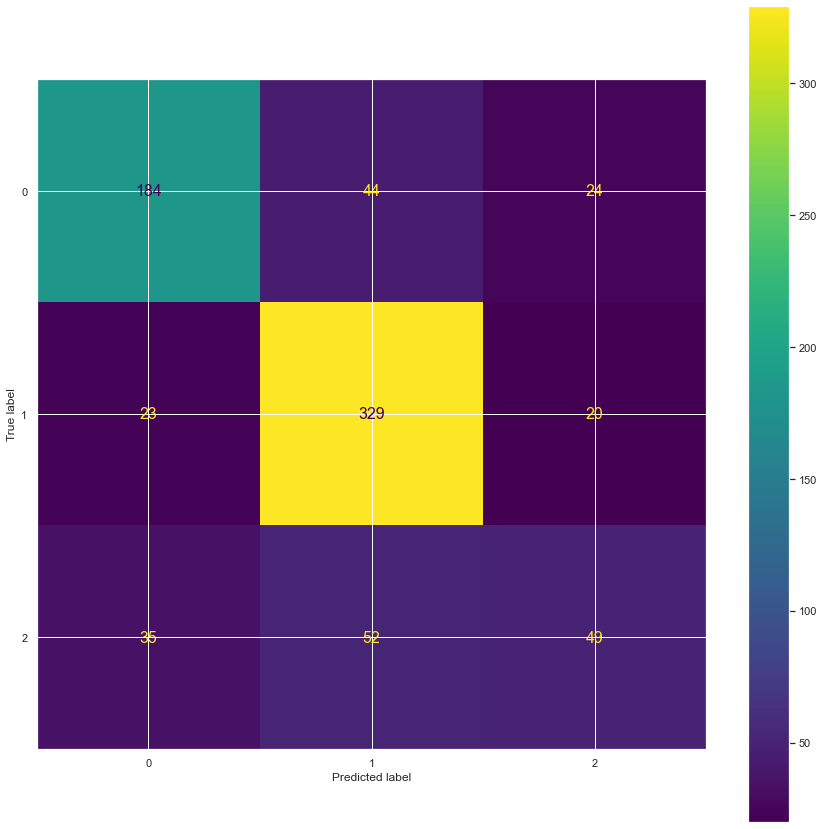

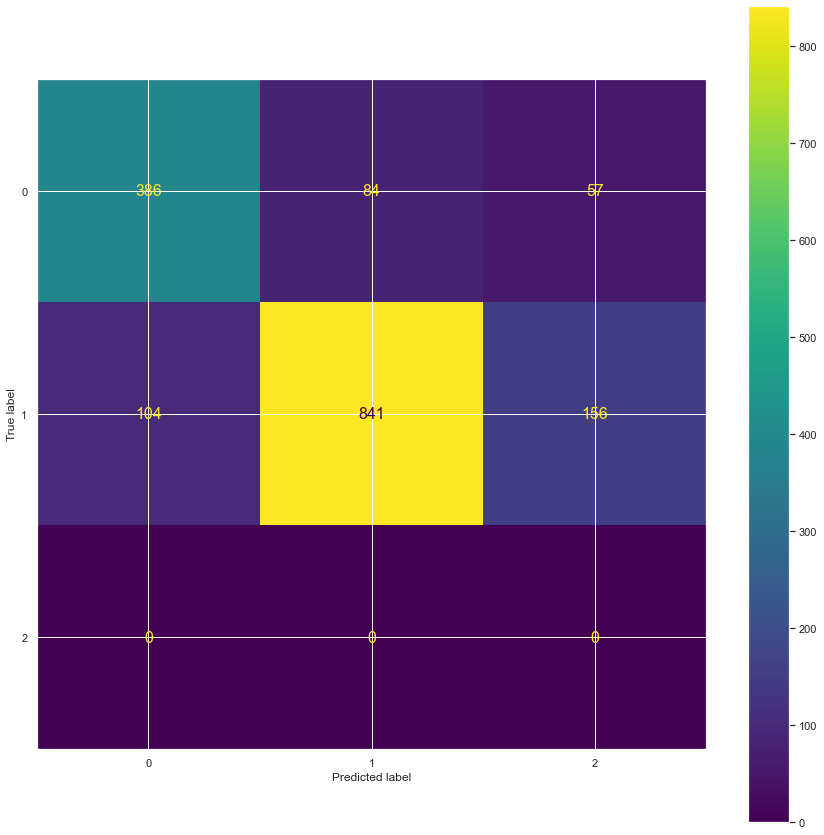

In [49]:
# from catboost import CatBoostClassifier
# cat_clf = CatBoostClassifier(thread_count=-1,iterations=500,loss_function='MultiClass',logging_level='Silent',one_hot_max_size=9000, )
test_set = [
    "v_6",
    "v_31",
    "v_5",
    "v_19",
    "v_29",
    "v_27",
    "v_17",
    "v_10",
    "v_36",
    "v_4",
    "v_22",
]
# X = final_data.loc[:,test_set]
X = final_data.drop(["target"], axis=1)
y = final_data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=10
)
pipe, y_pred, expe = run_pipe(X_train, y_train, X_test, y_test)
y_true_base = baseline_prediction_data.target
# y_pred_base = pipe.predict(final_pred_data)
# classification_report(y_true_base,y_pred_base)
pipe, y_pred, expe = run_pipe(X, y, final_pred_data, baseline_prediction_data.target)

### Best Until

```
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       242
           1       0.88      0.77      0.83       425
           2       0.36      0.53      0.43        93

    accuracy                           0.74       760
   macro avg       0.66      0.69      0.67       760
weighted avg       0.77      0.74      0.75       760
```
 - cohen_kappa_score
        0.5649207211999954
 - balanced_accuracy_score
        0.6582871499854422
 - accuracy_score
        0.6285526315789474
 - f1_score_micro
        0.7394736842105263
 - f1_score_macro
        0.6661609514839579
 - f1_score_weighted
        0.727693784365417


```
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       490
           1       0.76      0.91      0.83       925
           2       0.00      0.00      0.00       213

    accuracy                           0.75      1628
   macro avg       0.50      0.57      0.53      1628
weighted avg       0.65      0.75      0.70      1628

```
 - cohen_kappa_score
        0.5247767208816295
 - balanced_accuracy_score
        0.7481494311709038
 - accuracy_score
        0.6406326781326781
 - f1_score_micro
        0.7536855036855037
 - f1_score_macro
        0.5297675611996518
 - f1_score_weighted
        0.8071876580752345

In [ ]:
expe.columns

In [ ]:
X = nnom = final_data_indvl.loc[:, nominal].astype("category")
y = final_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
pipe, y_pred = run_pipe(X_train, y_train, X_test, y_test)


X_test = final_pred_data_indvl_test.loc[:, nominal].astype("category")
X_train = nnom
y_train = final_data.target
y_test = baseline_prediction_data.target
pipe, y_pred = run_pipe(X_train, y_train, X_test, y_test)
__t = [pd.Series(y_pred).value_counts().to_dict(), y_test.value_counts().to_dict()]
tablify(__t)

In [45]:
sclf = StackingClassifier(
    [
        ("AdaBoostClassifier", AdaBoostClassifier(random_state=10)),
        (
            "RandomForestClassifier",
            RandomForestClassifier(
                random_state=10,
            ),
        ),
    ],
    final_estimator=MLPClassifier(),
)
sclf
# perf_comp = pd.concat([y_test,pd.Series(y_pred,name='y_pred')],axis=1)

# perf_comp.groupby(['target'])['y_pred'].value_counts()

StackingClassifier(estimators=[('AdaBoostClassifier',
                                AdaBoostClassifier(random_state=10)),
                               ('RandomForestClassifier',
                                RandomForestClassifier(random_state=10))],
                   final_estimator=MLPClassifier())

In [ ]:
nnom = final_data_indvl.loc[:, nominal].astype("category")
X_train = nnom.astype("int")
y_train = final_data.target
X_test = final_pred_data_indvl_test.loc[:, nominal].astype("category")
encoder = BaseNEncoder(base=7)
# encoder.fit_base_n_encoding()
# encoder = NCVWrapper(PWrapper(TargetEncoder()))
# encoder = PWrapper(TargetEncoder())
# X_train_enc = encoder.fit_transform(X=X_train,y=y_train)
# X_train_enc = encoder.fit_transform(X_train,y_train)
# X_test_enc = encoder.transform(X_test)
enc_X = encoder.fit_transform(X_train.astype("category"))


# Feature_Selector.fit(X=enc_X, y=y_train, n_trials=10, sample=False,train_or_test = 'test', normalize=True, verbose=True)

In [ ]:
with parallel_backend("threading"):
    # cat_clf = CatBoostClassifier(thread_count=-1,iterations=500,loss_function='MultiClass',logging_level='Silent',one_hot_max_size=9000, )
    Feature_Selector = BorutaShap(
        model=DecisionTreeClassifier(), importance_measure="shap", classification=True
    )
    X = nnom = final_data.loc[:, nominal + binary + ratio + ordinal]
    y = final_data.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, shuffle=True
    )
    Feature_Selector.fit(
        X=X,
        y=y,
        n_trials=100,
        sample=False,
        train_or_test="test",
        normalize=True,
        verbose=True,
    )
    Feature_Selector.TentativeRoughFix()

In [ ]:
# confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
# fig = plt.figure(figsize=(15,15))
plt.rcParams.update({"font.size": 16})
fig, ax = plt.subplots(
    1,
    1,
    figsize=(15, 15),
)
# fig.set_f
disp = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=ax,
)
# disp.plot()